![DsProj](https://drek4537l1klr.cloudfront.net/cielen/Figures/02fig01_alt.jpg)

# 1. Understand the business problem
* Define objective
* How will DS/ML's solution be used?
* What solutions are there in place?
* How will you measure performance?
* Minimum performance required?

**IMPORTANT NOTE:** This is the most important step of the DS/ML project lifecycle. Make sure you define performance metrics and targets.


# 2. Prepare your DS/ML environment

*Why is this step relevant?*

It minimizes the risk of libary conflicts when sharing your project.

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

In [1]:
ls -ltr

total 4952
-rw-r--r--@ 1 bassel_instructor  staff  2243706 Dec 14 20:46 stock_analysis.ipynb
-rw-r--r--  1 bassel_instructor  staff     1487 Feb 14 20:55 fixed_width_ex.txt
-rw-r--r--  1 bassel_instructor  staff   283430 Feb 14 20:56 e2e_ml_walkthrough.ipynb


In [2]:
import sys

print(sys.version)

3.11.3 (v3.11.3:f3909b8bc8, Apr  4 2023, 20:12:10) [Clang 13.0.0 (clang-1300.0.29.30)]


In [3]:
pip freeze

absl-py==1.4.0
appdirs==1.4.4
appnope==0.1.3
asttokens==2.2.1
astunparse==1.6.3
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bokeh==3.2.0
Boruta==0.3
branca==0.6.0
cachetools==5.3.1
calmap==0.0.11
calplot==0.1.7.5
certifi==2023.5.7
cffi==1.15.1
chardet==5.1.0
charset-normalizer==3.1.0
click==8.1.4
click-plugins==1.1.1
cligj==0.7.2
comm==0.1.3
contourpy==1.0.7
cryptography==41.0.1
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
docx==0.2.4
et-xmlfile==1.1.0
exception==0.1.0
executing==1.2.0
fastjsonschema==2.17.1
Fiona==1.9.4.post1
flatbuffers==23.5.26
folium==0.14.0
fonttools==4.39.4
frozendict==2.3.8
gast==0.4.0
geopandas==0.13.2
google-auth==2.22.0
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
googlefinance==0.7
grpcio==1.49.1
h5py==3.9.0
html5lib==1.1
idna==3.4
imbalanced-learn==0.11.0
imblearn==0.0
inexactsearch==1.0.2
ipykernel==6.23.1
ipython==8.13.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jsonschema==4.17.3
jupyter_client==8.2.0
jupyter_core==5.3.0
keras==2.13.1
kiwiso

In [4]:
from importlib.metadata import version

version('pandas')

'2.0.2'

In [5]:
# Lib Versions
libr = ['pandas', 'numpy', 'seaborn']

for l in libr:
    print(l,':',version(l))

pandas : 2.0.2
numpy : 1.24.3
seaborn : 0.12.2


In [6]:
# get specific version of a module
#pip install calplot==0.1.7.5

# 3. Get data

* Find data and document sources
* Check for space
>* If RAM > datafile size, then do batch training
>* If RAM < datafile size, then do online training

* Check  terms and conditions
* If applicable: get access
* Create workspace / define storage location
* Get data
* Deal with sensitive information (delete, protect, anonymize)
* Sample test set


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Visit https://ipython.readthedocs.io/en/stable/interactive/plotting.html for information on %matplotlib

import seaborn as sns

# Hide warnings if you are presenting your project to an audience to make your code look cleaner
import warnings
warnings.filterwarnings("ignore")
# Visit https://docs.python.org/3/library/warnings.html for information on warning control

In [ ]:
# Option 1a: Import data from cvs
df = pd.read_csv("filename.csv")

# Option 1b: Import data from excel
df = pd.read_excel("filename.xlsx")

# Option 2: Import data from database
import pyodbc

# Define connector to database
driver = 'SQL Server'
server = 'servername or ip address' 
database = 'mydb' 
username = 'myusername' 
password = 'mypassword'
table = 'mytable'

connector = pyodbc.connect('DRIVER={'+driver+'};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)

# Define query
query = 'SELECT * FROM '+table
# Import query results into DataFrame
df = pd.read_sql(query, connector)
# Visit https://github.com/mkleehammer/pyodbc/wiki to learn more about pyobdc and its available drivers

### JSON

In [ ]:
import pandas as pd

# Example JSON data with multiple layers
json_data = '''
{
    "1": {
        "name": "John Doe",
        "age": 30,
        "address": "CA",
        
        "hobbies": ["reading", "traveling"]
    },
    "2": {
        "name": "James Hans",
        "age": 43,
        "State": 
            "NY",
        
        "hobbies": ["reading", "traveling"]
    }
}
'''

# Load JSON data into a DataFrame
df = pd.read_json(json_data, orient='index')
df

,name,age,address,hobbies,State
1,John Doe,30,CA,"[reading, traveling]",NaN
2,James Hans,43,NaN,"[reading, traveling]",NY


### Fixed Width

In [ ]:
#fixed_width_ex.txt
data = pd.read_fwf('fixed_width_ex.txt'
                    , header=None
                    , widths=[13,10,11,11,2,10,10]
                    , names=['CUR_CLM_UNIQ_ID', 'CLM_LINE_NUM','BENE_MBI_ID','ENE_HIC_NUM','CLM_TYPE_CD','CLM_LINE_FROM_DT','CLM_LINE_THRU_DT'])
data.head() 

,CUR_CLM_UNIQ_ID,CLM_LINE_NUM,BENE_MBI_ID,ENE_HIC_NUM,CLM_TYPE_CD,CLM_LINE_FROM_DT,CLM_LINE_THRU_DT
0,1002252238229,6,5XG4Q12KT98,NaN,10,2022-04-18,2022-04-18
1,1002252238229,23,5XG4Q12KT98,NaN,10,1000-01-01,1000-01-01
2,1002252238229,10,5XG4Q12KT98,NaN,10,2022-05-05,2022-05-05
3,1002252238229,12,5XG4Q12KT98,NaN,10,2022-04-06,2022-04-06
4,1002252238229,3,5XG4Q12KT98,NaN,10,2022-04-07,2022-04-07


### Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd


- `requests.get()` is a function from the `requests` library in Python. It sends a GET request to the specified URL ('https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States') to retrieve the content of the webpage.
   
- `.text` converts the response into plain text.

- This line fetches the content of the webpage and stores it in the variable `website_url`.



In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States').text
soup = BeautifulSoup(response,'lxml')


- `BeautifulSoup` is a library for parsing HTML and XML documents, allowing you to extract specific information from them.

- `BeautifulSoup()` is used to create a BeautifulSoup object, which represents the parsed content of the webpage.

- `website_url` is the HTML content that we fetched in the previous step.

- `'lxml'` is the parser used by BeautifulSoup to process the HTML content. `lxml` is a widely used and efficient library for parsing XML and HTML.

In [ ]:
#go to website and find the tag
My_table = soup.findAll("table",{"class":"wikitable"})

- `soup.findAll()` is a method provided by BeautifulSoup to find all elements that match a certain pattern.

- In this case, it's looking for `<table>` elements with the class attribute set to "wikitable".

In [ ]:
len(My_table) 

7

In [ ]:
#print to see it's in html
My_table

[<table class="wikitable sortable" style="border: 0; cellpadding: 2; cellspacing: 3;">
 <tbody><tr style="vertical-align:middle;">
 <th>Airline
 </th>
 <th>Image
 </th>
 <th><a class="mw-redirect" href="/wiki/IATA_airline_designator" title="IATA airline designator">IATA</a>
 </th>
 <th><a class="mw-redirect" href="/wiki/ICAO_airline_designator" title="ICAO airline designator">ICAO</a>
 </th>
 <th><a href="/wiki/Call_sign#Aviation" title="Call sign">Callsign</a>
 </th>
 <th>Primary hubs, <br/> <i>secondary hubs</i>
 </th>
 <th>Founded
 </th>
 <th class="unsortable">Notes
 </th></tr>
 <tr>
 <td><a href="/wiki/Alaska_Airlines" title="Alaska Airlines">Alaska Airlines</a>
 </td>
 <td><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:N615AS_Alaska_Airlines_2000_Boeing_737-790_C_N_30344_(28850996478).jpg"><img class="mw-file-element" data-file-height="1079" data-file-width="1851" decoding="async" height="58" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/N615AS_

In [ ]:
# Convert the HTML table to a DataFrame
df = pd.read_html(str(My_table[0]))[0]
df.head()

,Airline,Image,IATA,ICAO,Callsign,"Primary hubs, secondary hubs",Founded,Notes
0,Alaska Airlines,NaN,AS,ASA,ALASKA,Seattle/Tacoma Anchorage Portland (OR) San Fra...,1932,Founded as McGee Airways and commenced operati...
1,Allegiant Air,NaN,G4,AAY,ALLEGIANT,Las Vegas Cincinnati Fort Walton Beach Indiana...,1997,Founded as WestJet Express and began operation...
2,American Airlines,NaN,AA,AAL,AMERICAN,Dallas/Fort Worth Charlotte Chicago-O'Hare Los...,1926,Founded as American Airways and commenced oper...
3,Avelo Airlines,NaN,XP,VXP,AVELO,Burbank New Haven Orlando Raleigh/Durham Wilmi...,1987,First did business as Casino Express Airlines ...
4,Breeze Airways,NaN,MX,MXY,MOXY,Charleston Hartford New Orleans Norfolk Provid...,2018,Founded as Moxy Airways but was renamed due to...


# 4. Explore data to gain insights

Look for:

- Find Target Variable (if you are dealing with a supervised ML model)
- Size of the dataset (ensure it's appropriate for your used machine - otherwise, perform memory optimization)
- Number of features to understand the model complexity and processing demand
- Perform EDA and visualize the data
    - Outliers
    - Distribution (skewness)
    - Scale
    - Missing values
    - Data quality (unique values, data types, typos)
    - Correlation
    - Check for rare values
    - Label encoding


In [ ]:
## Size, variables and dtypes
df.info(memory_usage='deep')

In [ ]:
#to do it for all int columns
df_int = df.select_dtypes(include='int')
df_int.info(memory_usage='deep')

In [ ]:
df_int = df_int.astype('int8')
df_int.info(memory_usage='deep')

In [ ]:
# Missing values
df.isnull().mean().sort_values(ascending=False)

In [ ]:
# Cardinality
df.describe(include='O')

When performing feature selection, you can feel safe to remove variables that meet the following conditions:
* Cardinality >= 95% of observations
* Cardinality == 1 (this means you have a constant categorical *variable*)

In [ ]:
# Unique values (for categorical ONLY)
df.nunique()

In [ ]:
# Distributions, scale, and outliers
df.describe()
# For distributions, look for differences in mean vs std vs percentiles
# For scale, look for different orders of magnitud between variables' min/max

# Distributions only (for outliers, values further away from zero indicate more extreme outliers) 
df.skew().sort_values(ascending=False)

In [ ]:
# Correlations
df.corr()

## 5.1 Feature engineering

**Feature Engineering: The Magic Touch for AI and ML Models**

Imagine you're training a model to predict if someone will click on an ad. The raw data you have might be things like age, location, income, and website visited. These are your **features**, the basic building blocks your model uses to make its predictions.

**Feature engineering** is like refining these building blocks. It's the process of **transforming and combining raw data** to create **new features** that are **more informative and relevant** to your specific problem. Think of it as giving your model sharper, more polished tools to work with.

Here's why feature engineering is **crucial** in AI and ML:

1. Boosts Model Performance
2. Reduces Overfitting
3. Uncovers hidden insights

Most common techniques:
* Missing values
* Label encoding
* Outlier handling
* Scaling
* Dimensionality reduction

# 5. Prepare your data 



### Imputation

In [ ]:
import pandas as pd
import numpy as np

students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', 'CalTech', 'MSU', 'MIT', 'CalTech', 'None', 'CalTech', 'None'],
}

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,CalTech
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,NaN,None


In [ ]:
# pandas method
df['Score'].fillna(df['Score'].mean(skipna=True), inplace=True)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,38.2,None


In [ ]:
mostFreqVal = df['University'].mode()[0]
mostFreqVal

'CalTech'

In [ ]:
df['University'].fillna(mostFreVal, inplace=True) #only works if you have NaN
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,None
6,Kelly,42.0,CalTech
7,Todd,38.2,None


### Outlier Treatments
- IQR Method
- Z Scores
- Percentiles

### Scaling 
- **Normalization** scaling data between 0 and 1 `MinMaxScaler`
- **Standardization** you have a mean of 0 and standard deviation of 1 `StandardScaler`

### Encoding
- standard
- ordinal
- one hot encoding

### Feature Extraction

> Jump to Sol_Bassel

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('Project 1 - Healthcare Insurance Analysis/Hospitalisation details.csv')
df1.head()

In [ ]:
df2 = pd.read_csv('Project 1 - Healthcare Insurance Analysis/Medical Examinations.csv')
df2.head()

In [ ]:
df3 = pd.read_excel('Project 1 - Healthcare Insurance Analysis/Names.xlsx')
df3.head()

In [ ]:
df_1_and_2 = pd.merge(df1,df2,on='Customer ID')
df_final = pd.merge(df_1_and_2,df3,on='key')

In [ ]:
df2['NumberOfMajorSurgeries'].value_counts(normalize=True)

#### Extracting age from date of birth columns (year, month, date)
1. convert month into numbers {'Jan':1, 'Feb':2....} or use strptime function to conver MMM to #. use %b for conversion
2. concatenate all three columns into one
3. convert the output into a datetime column
4. current date - date of birth column and divide by 365


## *Important notes:*
1. Split your dataset in train and test before applying any fit method.
2. fit ONLY training data
3. Transform both train and test


![split](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])
y = df['Target']

# For the larger the dataset, the smaller the test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Handling missing values:
https://feature-engine.readthedocs.io/en/latest/imputation/index.html

In [ ]:
# Numerical missing values. Use median for skewed data and mean for gaussian distributions

from feature_engine.imputation import MeanMedianImputer
num_imputer = MeanMedianImputer()

# Categorical missing values will replace NaN with Missing
from feature_engine.imputation import CategoricalImputer
cat_imputer = CategoricalImputer(value='Missing')


Categorical encoders: https://feature-engine.readthedocs.io/en/latest/encoding/index.html


In [ ]:
# Rare label encoder for high cardinality variables where there may be elements in test but not in train. Will replace values with Rare
from feature_engine.encoding import RareLabelEncoder
rare_encoder = RareLabelEncoder(replace_with='Rare')

# Select the best encoder based on your use case and dataset. If you are unsure, try OrdinalEncoder
from feature_engine.encoding import OrdinalEncoder
cat_encoder = OrdinalEncoder()

Handling outliers: https://feature-engine.readthedocs.io/en/latest/outliers/index.html

In [ ]:
# Winsorizer() caps maximum and / or minimum values of a variable

from feature_engine.outliers import Winsorizer
capper = Winsorizer(capping_method='iqr', tail='both')

Data scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [ ]:
# The most popular scalers are StandardScaler and RobustScaler. More info in the link above

# Recommended use of sklearn wrapper to continue working with DataFrames
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper
scaler = SklearnTransformerWrapper(transformer = RobustScaler())

Dimensionality reduction with PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Use n_components < 1 for explained variance sum and n_components > 1 for specific number of components to keep
# Besides PCA you can also try LDA, tSNE, IsoMap, etc.

from sklearn.decomposition import PCA
dim_red = SklearnTransformerWrapper(transformer = PCA(n_components=0.95))

## 5.2 Feature selection
https://scikit-learn.org/stable/modules/feature_selection.html

https://feature-engine.readthedocs.io/en/latest/selection/index.html

In [ ]:
# Basic feature selection: remove constant, quasi-constant and duplicate variables

from feature_engine.selection import DropConstantFeatures
cons_features = DropConstantFeatures(tol=0.95)

from feature_engine.selection import DropDuplicateFeatures
duplicates = DropDuplicateFeatures()

In [ ]:
# Correlated feature selection (colinearity)

# Change scoring, selection_method, and estimator when applicable
from feature_engine.selection import SmartCorrelatedSelection
corr_features = SmartCorrelatedSelection(selection_method="variance",estimator=None, scoring='roc_auc')

For wrapper algorithms (Forward selection, backward selection, exhaustive search) refer to:
* Forward/backward selection: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* Exhaustive search: http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/

*NOTE: Wrapper methods are computationally greedy and require a model to be tried on.*

In [ ]:
# Embedded feature selection with sklearn.feature_selection.SelectFromModel

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

Hybrid feature selection techniques:
* **SelectByShuffling**: selects features by determining the drop in machine learning model performance when each feature’s values are randomly shuffled
* **RecursiveFeatureElimination** and RecursiveFeatureAddition: selects features following a recursive process


In [ ]:
# Shuffle selector depends on a model to train

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from feature_engine.selection import ShuffleFeaturesSelector
shuffle_selector = SelectByShuffling(estimator=model, scoring="r2", cv=3)

In [ ]:
# RecursiveFeatureElimination depends on a model to train

from sklearn.linear_model import LinearRegression
model = LinearRegression()

from feature_engine.selection import RecursiveFeatureElimination
recursive_selector = RecursiveFeatureElimination(estimator=model, scoring="r2", cv=3)

## 5.3 Create your transformer pipeline


In [ ]:
# Import make_pipeline
from sklearn.pipeline import make_pipeline

# Define pipeline steps
transformer_pipe = make_pipeline(num_imputer,
                                 cat_imputer,
                                 rare_encoder,
                                 cat_encoder,
                                 capper,
                                 scaler,
                                 cons_features,
                                 duplicates,
                                 corr_features,
                                 recursive_selector,
                                 dim_red,
                                 )

#fit and transform
X_train = transformer_pipe.fit_transform(X_train, y_train)
X_test = transformer_pipe.transform(X_test, y_test)

# Save pipeline in pickle file
import pickle

with open ('transformer_pipeline.pkl', 'wb') as name:
  pickle.dump(transformer_pipe, name)

# 6. Try different algorithms
(https://mlflow.org/ can be used to track models’ performance and hyper parameters)
* Try default hyperparameters first (unless you have good notion on what hyperparams will improve performance and their values)
* Measure and compare performance
* Short-list top 1-3 models for hyperparameter tuning


In [ ]:
# Import algorithms to try

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tpot import TPOTRegressor
from catboost import CatBoostRegressor

In [ ]:
# Create table with models and its performance
# IMPORTANT NOTE: change metrics and algorithms as you see fit

# Define algorithms to try
algorithms = []
algorithms.append(('ElasticNet', ElasticNet()))
algorithms.append(('Random Forest', RandomForestRegressor()))
algorithms.append(('XG Boost', XGBRegressor()))
algorithms.append(('LightGBM', LGBMRegressor()))
algorithms.append(('Genetic', TPOTRegressor()))
algorithms.append(('CatBoost', CatBoostRegressor()))

# Initialize lists
names = []
train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []
cross_validation_scores = []
runtime = []

# Iterate ofer each element in algorithms
for name, reg in algorithms:
  t1 = time.time()
  names.append(name)
  reg.fit(X_train, y_train)
  train_rmse.append(mean_squared_error(y_train, reg.predict(X_train), squared=False))
  test_rmse.append(mean_squared_error(y_test, reg.predict(X_test), squared=False))
  train_r2.append(r2_score(y_train, reg.predict(X_train)))
  test_r2.append(r2_score(y_test, reg.predict(X_test)))
  cross_validation_scores.append(cross_val_score(reg, np.vstack((X_train, X_test)), np.hstack((y_train, y_test))).mean())
  t2 = time.time()
  runtime.append(t2-t1)

# Create comparison dataframe
model_comparison = pd.DataFrame({'Algorithm': names,
                                 'Train RMSE': train_rmse,
                                 'Test_RMSE': test_rmse,
                                 'Train r2 score': train_r2,
                                 'Test r2 score': test_r2,
                                 'Cross validation score': cross_validation_scores,
                                 'Runtime': runtime,})

# Sort by Test_RMSE
model_comparison.sort_values(by=['Test_RMSE'])

## ROC/AUC Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test_pred = classifier.predict(X_test)

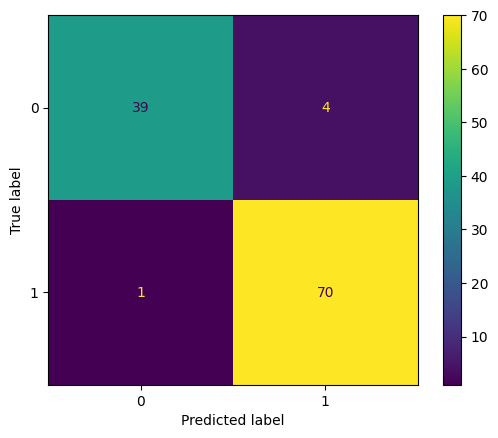

In [ ]:
CM = confusion_matrix(y_test, y_test_pred)
CM_disp = ConfusionMatrixDisplay(confusion_matrix=CM)
CM_disp.plot()

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



![cm](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

In [ ]:

# Predict probabilities for the test set
probs = classifier.predict_proba(X_test)
probs_positive = probs[:, 1]  # probabilities of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)
roc_auc = auc(fpr, tpr)


In [ ]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Explanation:

1. We load the breast cancer dataset using scikit-learn's `load_breast_cancer` function.
2. The dataset is split into training and testing sets using `train_test_split`.
3. We train a logistic regression classifier on the training data.
4. The classifier's probabilities of predicting the positive class are computed using `predict_proba`.
5. We compute the ROC curve and AUC (Area Under the Curve) using `roc_curve` and `auc`.
6. Finally, we plot the ROC curve using Matplotlib.

Interpretation of results:
- The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings.
- The area under the ROC curve (AUC) provides a single scalar value summarizing the classifier's performance. AUC closer to 1 indicates better performance, while 0.5 represents a random classifier.

In practice, you would compare the ROC curve and AUC of multiple classifiers to determine which one performs better for your specific task.

Interpretation:

- The ROC curve shows the trade-off between True Positive Rate (TPR, correctly classified setosa) and False Positive Rate (FPR, mistakenly classified as setosa).
- A perfect classifier would have a ROC curve hugging the top left corner, achieving 100% TPR (all setosa correctly identified) with 0% FPR (no mistakes).
- Our AUC score (0-1) represents the area under the ROC curve. A higher score (closer to 1) indicates better classification performance.
- Analyze the curve and AUC score in the context of your specific problem. Here, a high AUC would be desirable for accurately identifying Iris setosa flowers.


> never be below the diagonal line. Maximize TPR. Minimize FPR.